In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import datetime as dt
import time
import numpy as np
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from requests.packages.urllib3.util import Retry
from requests.adapters import HTTPAdapter
from requests import Session, exceptions

In [2]:
headlines_page = requests.get("http://www.espn.com/nba/news/archive/_/month/january/year/2020")
soup = BeautifulSoup(headlines_page.content,'lxml')

In [3]:
headline_title = soup.find_all("li")
headline_title

[<li><a href="http://www.espn.com/nba/story/_/id/28610796/kyrie-irving-puts-54-points-chicago-bulls-kobe-mentality" title="Kyrie puts 54 points on the Bulls with 'Kobe mentality'">Kyrie puts 54 points on the Bulls with 'Kobe mentality'</a> (February 1, 2020, 2:41 AM ET)</li>,
 <li><a href="http://www.espn.com/nba/preview?gameId=401161373" title="Hot-shooting Irving, Nets visit Wizards">Hot-shooting Irving, Nets visit Wizards</a> (February 1, 2020, 2:04 AM ET)</li>,
 <li><a href="http://www.espn.com/nba/story/_/id/28607660/the-lakers-blazers-put-show-honoring-kobe-bryant" title="The Lakers and Blazers put on a show in honoring Kobe Bryant">The Lakers and Blazers put on a show in honoring Kobe Bryant</a> (February 1, 2020, 2:03 AM ET)</li>,
 <li><a href="http://www.espn.com/nba/story/_/id/28610751/zion-williamson-swaps-jerseys-ja-morant-dominating-grizzlies" title="Zion swaps jerseys with Ja after dominating Grizz">Zion swaps jerseys with Ja after dominating Grizz</a> (February 1, 2020, 

In [4]:
titles_list = [headline_title[i].text for i in range(0,len(headline_title))] 
titles_list #preview the list

["Kyrie puts 54 points on the Bulls with 'Kobe mentality' (February 1, 2020, 2:41 AM ET)",
 'Hot-shooting Irving, Nets visit Wizards (February 1, 2020, 2:04 AM ET)',
 'The Lakers and Blazers put on a show in honoring Kobe Bryant (February 1, 2020, 2:03 AM ET)',
 'Zion swaps jerseys with Ja after dominating Grizz (February 1, 2020, 2:00 AM ET)',
 "Kyrie uses 'Mamba mentality' to drop 54 on Bulls (February 1, 2020, 1:43 AM ET)",
 'LeBron reveals Black Mamba tattoo saluting Kobe (February 1, 2020, 1:31 AM ET)',
 "Pelicans' Hayes sorry for vulgar Rising Stars rant (February 1, 2020, 1:28 AM ET)",
 "Giannis starts with brother for Bucks' Greek Night (February 1, 2020, 1:27 AM ET)",
 'Barton, Nuggets hand Bucks rare defeat at home, 127-115 (February 1, 2020, 1:08 AM ET)',
 'Thunder rally in final minutes, push past Suns 111-107 (February 1, 2020, 12:50 AM ET)',
 "Raptors' Nurse to coach Team Giannis in ASG (February 1, 2020, 12:19 AM ET)",
 'Zion scores 24, Pelicans pound Memphis 139-111 (Fe

In [5]:
headlines_only_list = []
for item in titles_list:
    if '(' and ')' not in item:
        continue
    else:
        headlines_only_list.append(item)

In [6]:
headlines_only_list


["Kyrie puts 54 points on the Bulls with 'Kobe mentality' (February 1, 2020, 2:41 AM ET)",
 'Hot-shooting Irving, Nets visit Wizards (February 1, 2020, 2:04 AM ET)',
 'The Lakers and Blazers put on a show in honoring Kobe Bryant (February 1, 2020, 2:03 AM ET)',
 'Zion swaps jerseys with Ja after dominating Grizz (February 1, 2020, 2:00 AM ET)',
 "Kyrie uses 'Mamba mentality' to drop 54 on Bulls (February 1, 2020, 1:43 AM ET)",
 'LeBron reveals Black Mamba tattoo saluting Kobe (February 1, 2020, 1:31 AM ET)',
 "Pelicans' Hayes sorry for vulgar Rising Stars rant (February 1, 2020, 1:28 AM ET)",
 "Giannis starts with brother for Bucks' Greek Night (February 1, 2020, 1:27 AM ET)",
 'Barton, Nuggets hand Bucks rare defeat at home, 127-115 (February 1, 2020, 1:08 AM ET)',
 'Thunder rally in final minutes, push past Suns 111-107 (February 1, 2020, 12:50 AM ET)',
 "Raptors' Nurse to coach Team Giannis in ASG (February 1, 2020, 12:19 AM ET)",
 'Zion scores 24, Pelicans pound Memphis 139-111 (Fe

In [7]:
txt = headlines_only_list[0]
pattern = '\((.*)\)'
x = re.search(pattern, txt)
x.group().replace('(', '').replace(')', '')



'February 1, 2020, 2:41 AM ET'

In [8]:
txt2 = headlines_only_list[0]
pattern = '\((.*)\)'
new_string = re.sub(pattern, repl='', string=txt2)
new_string.strip()

"Kyrie puts 54 points on the Bulls with 'Kobe mentality'"

In [9]:
start_num = headlines_only_list[0].rfind('(')
end_num = headlines_only_list[0].rfind(')')

headlines_only_list[0][start_num+1:end_num]

'February 1, 2020, 2:41 AM ET'

In [10]:
headlines_only_list[0][:start_num].strip()

"Kyrie puts 54 points on the Bulls with 'Kobe mentality'"

In [11]:
def clean_headlines(headline_list):
    rm_timestamp_list = [] #create empty list for headlines without timestamps
    timestamps_list = []   #create empty list for timestamps of headlines
    for i in headline_list:
        timestamp_start = i.rfind('(') #assign index value of last open parentheses to variable
        timestamp_end = i.rfind(')')   #assign index value of last closed parentheses to variable
        last_comma = i.rfind(',')      #assign index value of last comma to  a variable
        
        rm_timestamp_list.append(i[:timestamp_start].strip())
        
        timestamps_list.append(i[timestamp_start+1:last_comma])
        
        
    return rm_timestamp_list, timestamps_list
        
        

In [12]:
headlines_clean_list, timestamp_strings_list = clean_headlines(headlines_only_list)

In [13]:
headlines_clean_list

["Kyrie puts 54 points on the Bulls with 'Kobe mentality'",
 'Hot-shooting Irving, Nets visit Wizards',
 'The Lakers and Blazers put on a show in honoring Kobe Bryant',
 'Zion swaps jerseys with Ja after dominating Grizz',
 "Kyrie uses 'Mamba mentality' to drop 54 on Bulls",
 'LeBron reveals Black Mamba tattoo saluting Kobe',
 "Pelicans' Hayes sorry for vulgar Rising Stars rant",
 "Giannis starts with brother for Bucks' Greek Night",
 'Barton, Nuggets hand Bucks rare defeat at home, 127-115',
 'Thunder rally in final minutes, push past Suns 111-107',
 "Raptors' Nurse to coach Team Giannis in ASG",
 'Zion scores 24, Pelicans pound Memphis 139-111',
 'Irving scores season-high 54, Nets beat Bulls 133-118',
 'Harden has 35 as Rockets beat Mavericks 128-121',
 "Raptors' streak at 10 after 105-92 win over Pistons",
 "Emotional Melo 'not ready,' to sit out vs. Lakers",
 'Spurs face critical game against hapless Hornets',
 "Mavs' Doncic has sprain, out at least 6 games",
 "Warriors, Cavs matc

In [14]:
df = pd.DataFrame({'headlines': headlines_clean_list, 'posted_time': timestamp_strings_list})
df.head()

,headlines,posted_time
0,Kyrie puts 54 points on the Bulls with 'Kobe m...,"February 1, 2020"
1,"Hot-shooting Irving, Nets visit Wizards","February 1, 2020"
2,The Lakers and Blazers put on a show in honori...,"February 1, 2020"
3,Zion swaps jerseys with Ja after dominating Grizz,"February 1, 2020"
4,Kyrie uses 'Mamba mentality' to drop 54 on Bulls,"February 1, 2020"


In [15]:
df['posted_time'] = pd.to_datetime(df['posted_time'], format='%B %d, %Y')

In [16]:
df.head()

,headlines,posted_time
0,Kyrie puts 54 points on the Bulls with 'Kobe m...,2020-02-01
1,"Hot-shooting Irving, Nets visit Wizards",2020-02-01
2,The Lakers and Blazers put on a show in honori...,2020-02-01
3,Zion swaps jerseys with Ja after dominating Grizz,2020-02-01
4,Kyrie uses 'Mamba mentality' to drop 54 on Bulls,2020-02-01


In [17]:
stopwords = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()

In [18]:
def create_tokens(headline_string):
    
    no_punc_text = "".join([word for word in headline_string if word not in string.punctuation]) #remove punctuation
    tokens = re.split('\W+', no_punc_text) #split words by in no_punc_text variable by whitespace
    
    #Lemmatize each token and store tokens in a list
    final_tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    
    return final_tokens

In [19]:
df['headline_tokens'] = df['headlines'].apply(lambda x: create_tokens(x.lower()))

In [20]:
#pd.set_option('display.max_colwidth', -1)
df.head(20)

,headlines,posted_time,headline_tokens
0,Kyrie puts 54 points on the Bulls with 'Kobe m...,2020-02-01,"[kyrie, put, 54, point, bull, kobe, mentality]"
1,"Hot-shooting Irving, Nets visit Wizards",2020-02-01,"[hotshooting, irving, net, visit, wizard]"
2,The Lakers and Blazers put on a show in honori...,2020-02-01,"[lakers, blazer, put, show, honoring, kobe, br..."
3,Zion swaps jerseys with Ja after dominating Grizz,2020-02-01,"[zion, swap, jersey, ja, dominating, grizz]"
4,Kyrie uses 'Mamba mentality' to drop 54 on Bulls,2020-02-01,"[kyrie, us, mamba, mentality, drop, 54, bull]"
5,LeBron reveals Black Mamba tattoo saluting Kobe,2020-02-01,"[lebron, reveals, black, mamba, tattoo, saluti..."
6,Pelicans' Hayes sorry for vulgar Rising Stars ...,2020-02-01,"[pelican, hayes, sorry, vulgar, rising, star, ..."
7,Giannis starts with brother for Bucks' Greek N...,2020-02-01,"[giannis, start, brother, buck, greek, night]"
8,"Barton, Nuggets hand Bucks rare defeat at home...",2020-02-01,"[barton, nugget, hand, buck, rare, defeat, hom..."
9,"Thunder rally in final minutes, push past Suns...",2020-02-01,"[thunder, rally, final, minute, push, past, su..."


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tfidf_vec = TfidfVectorizer(stop_words=stopwords)
X_tfidf = tfidf_vec.fit_transform(df['headlines'])


In [23]:
print(X_tfidf.shape)

(885, 1735)


In [24]:
tfidf_df = pd.DataFrame(X_tfidf.toarray())
tfidf_df.columns = tfidf_vec.get_feature_names()

In [25]:
pd.set_option('max_columns', 10)
tfidf_df.head()

,000,10,100,101,102,...,youngest,zach,zaza,zion,zizic
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.270419,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0


In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Calinski Harabasz Score')

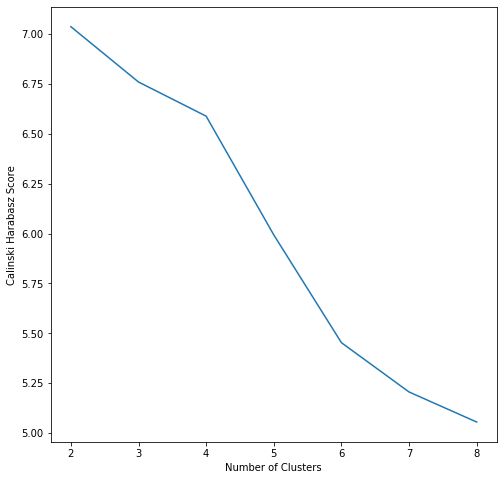

In [27]:
ch_score_vals = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(tfidf_df)
    cluster_assignments = kmeans.predict(tfidf_df)
    ch_score = calinski_harabasz_score(tfidf_df, cluster_assignments)
    ch_score_vals.append(ch_score)

plt.figure(figsize=(8,8))
plt.plot(list(range(2,9)), ch_score_vals)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')

In [28]:
def grab_espn_webpage(month, year):
    sess = Session()
    sess.mount('http://www.espn.com/nba/news/archive', 
               HTTPAdapter(max_retries=Retry(total=5, status_forcelist=[500, 503], backoff_factor=3)))
    
    url = f"http://www.espn.com/nba/news/archive/_/month/{month}/year/{year}"
    webpage = sess.get(url)
    
        
    soup_contents = BeautifulSoup(webpage.content,'lxml')
    
  
    headline_title_content = soup_contents.find_all("li")
    
    webpage_text = [headline_title_content[i].text for i in range(0,len(headline_title_content))] 
    
    headlines_dates = []
    for item in webpage_text:
        if '(' and ')' not in item:
            continue
        else:
            headlines_dates.append(item)
            
    headlines_only, dates_only = clean_headlines(headlines_dates)
    
    df_standard = pd.DataFrame({'headlines': headlines_only, 'posted_time': dates_only})
    df_standard['tokens'] = df_standard['headlines'].apply(lambda x: create_tokens(x.lower()))
    df_standard['posted_time'] = pd.to_datetime(df_standard['posted_time'], format='%B %d, %Y')
    
    return df_standard
            
    
    

In [29]:
#get ESPN headlines for an entire year
jan2016 = grab_espn_webpage('january', 2016)
feb2016 = grab_espn_webpage('february', 2016)
mar2016 = grab_espn_webpage('march', 2016)
apr2016 = grab_espn_webpage('april', 2016)

may2016 = grab_espn_webpage('may', 2016)
jun2016 = grab_espn_webpage('june', 2016)
jul2016 = grab_espn_webpage('july', 2016)
aug2016 = grab_espn_webpage('august', 2016)

sept2016 = grab_espn_webpage('september', 2016)
oct2016 = grab_espn_webpage('october', 2016)
nov2016 = grab_espn_webpage('november', 2016)
dec2016 = grab_espn_webpage('december', 2016)

In [30]:
#get ESPN headlines for an entire year

jan2017 = grab_espn_webpage('january', 2017)
feb2017 = grab_espn_webpage('february', 2017)
mar2017 = grab_espn_webpage('march', 2017)
apr2017 = grab_espn_webpage('april', 2017)

may2017 = grab_espn_webpage('may', 2017)
jun2017 = grab_espn_webpage('june', 2017)
jul2017 = grab_espn_webpage('july', 2017)
aug2017 = grab_espn_webpage('august', 2017)

sept2017 = grab_espn_webpage('september', 2017)
oct2017 = grab_espn_webpage('october', 2017)
nov2017 = grab_espn_webpage('november', 2017)
dec2017 = grab_espn_webpage('december', 2017)

In [31]:
jan2018 = grab_espn_webpage('january', 2018)
feb2018 = grab_espn_webpage('february', 2018)
mar2018 = grab_espn_webpage('march', 2018)
apr2018 = grab_espn_webpage('april', 2018)

may2018 = grab_espn_webpage('may', 2018)
jun2018 = grab_espn_webpage('june', 2018)
jul2018 = grab_espn_webpage('july', 2018)
aug2018 = grab_espn_webpage('august', 2018)

sept2018 = grab_espn_webpage('september', 2018)
oct2018 = grab_espn_webpage('october', 2018)
nov2018 = grab_espn_webpage('november', 2018)
dec2018 = grab_espn_webpage('december', 2018)

In [32]:
jan2019 = grab_espn_webpage('january', 2019)
feb2019 = grab_espn_webpage('february', 2019)
mar2019 = grab_espn_webpage('march', 2019)
apr2019 = grab_espn_webpage('april', 2019)

may2019 = grab_espn_webpage('may', 2019)
jun2019 = grab_espn_webpage('june', 2019)
jul2019 = grab_espn_webpage('july', 2019)
aug2019 = grab_espn_webpage('august', 2019)

sept2019 = grab_espn_webpage('september', 2019)
oct2019 = grab_espn_webpage('october', 2019)
nov2019 = grab_espn_webpage('november', 2019)
dec2019 = grab_espn_webpage('december', 2019)

In [33]:
jan2020 = grab_espn_webpage('january', 2020)
feb2020 = grab_espn_webpage('february', 2020)
mar2020 = grab_espn_webpage('march', 2020)
apr2020 = grab_espn_webpage('april', 2020)

may2020 = grab_espn_webpage('may', 2020)
jun2020 = grab_espn_webpage('june', 2020)
jul2020 = grab_espn_webpage('july', 2020)
aug2020 = grab_espn_webpage('august', 2020)

sept2020 = grab_espn_webpage('september', 2020)
oct2020 = grab_espn_webpage('october', 2020)
nov2020 = grab_espn_webpage('november', 2020)
dec2020 = grab_espn_webpage('december', 2020)

In [34]:
jan2021 = grab_espn_webpage('january', 2021)
feb2021 = grab_espn_webpage('february', 2021)

In [35]:
from yellowbrick.cluster import KElbowVisualizer

yellowbrick.cluster.elbow.KElbowVisualizer

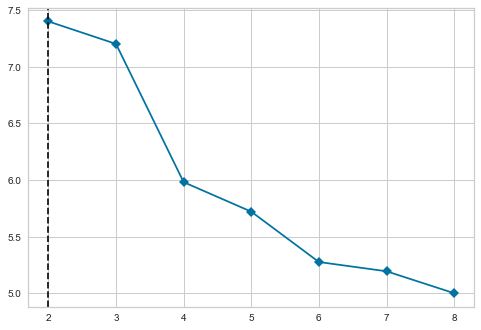

In [36]:
model_ = KMeans()
visualizer_ = KElbowVisualizer(model_, k=(2,9), metric = 'calinski_harabasz', timings=False)
type(visualizer_.fit(tfidf_df))

In [37]:
def tfidf_vectorizer(dataframe):
    
    tfidf = TfidfVectorizer(stop_words=stopwords)
    month_tfidf = tfidf.fit_transform(dataframe['headlines'])
    
    month_df = pd.DataFrame(month_tfidf.toarray())
    month_df.columns = tfidf.get_feature_names()
    
    return month_df

In [38]:
jan16_tfidf = tfidf_vectorizer(jan2016)
feb16_tfidf = tfidf_vectorizer(feb2016)
mar16_tfidf = tfidf_vectorizer(mar2016)
apr16_tfidf = tfidf_vectorizer(apr2016)

may16_tfidf = tfidf_vectorizer(may2016)
jun16_tfidf = tfidf_vectorizer(jun2016)
jul16_tfidf = tfidf_vectorizer(jul2016)
aug16_tfidf = tfidf_vectorizer(aug2016)

sept16_tfidf = tfidf_vectorizer(sept2016)
oct16_tfidf = tfidf_vectorizer(oct2016)
nov16_tfidf = tfidf_vectorizer(nov2016)
dec16_tfidf = tfidf_vectorizer(dec2016)



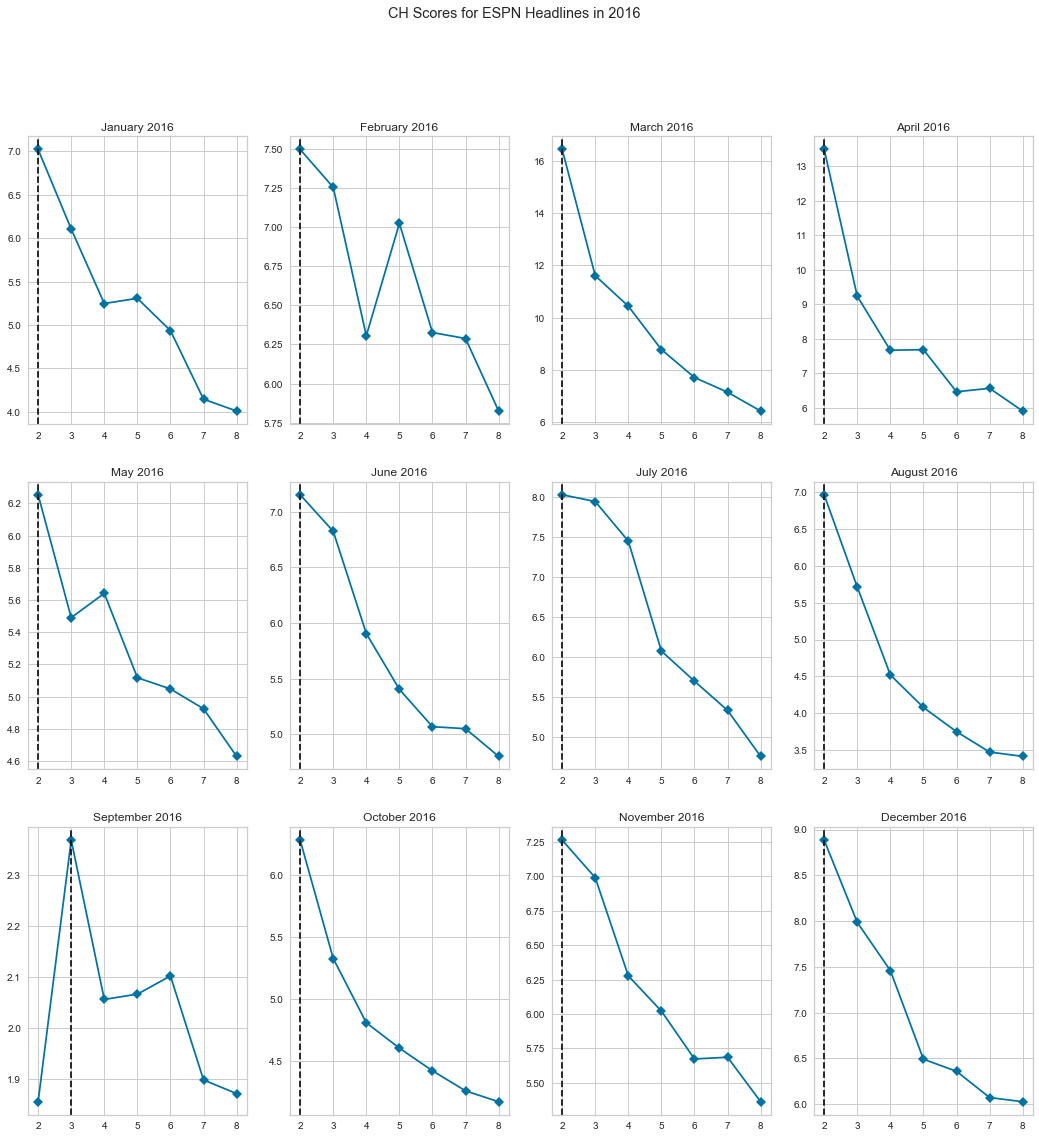

In [39]:
fig, axs = plt.subplots(3, 4, figsize=(18,18))
kmeans = KMeans()

jan_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,0])
jan_viz.fit(jan16_tfidf)
axs[0,0].set_title('January 2016');

feb_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,1])
feb_viz.fit(feb16_tfidf)
axs[0,1].set_title('February 2016');

mar_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,2])
mar_viz.fit(mar16_tfidf)
axs[0,2].set_title('March 2016');

apr_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,3])
apr_viz.fit(apr16_tfidf)
axs[0,3].set_title('April 2016');

may_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,0])
may_viz.fit(may16_tfidf)
axs[1,0].set_title('May 2016');

jun_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,1])
jun_viz.fit(jun16_tfidf)
axs[1,1].set_title('June 2016');

jul_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,2])
jul_viz.fit(jul16_tfidf)
axs[1,2].set_title('July 2016');

aug_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,3])
aug_viz.fit(aug16_tfidf)
axs[1,3].set_title('August 2016');

sept_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,0])
sept_viz.fit(sept16_tfidf)
axs[2,0].set_title('September 2016');

oct_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,1])
oct_viz.fit(oct16_tfidf)
axs[2,1].set_title('October 2016');

nov_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,2])
nov_viz.fit(nov16_tfidf)
axs[2,2].set_title('November 2016');

dec_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,3])
dec_viz.fit(dec16_tfidf)
axs[2,3].set_title('December 2016');

plt.suptitle('CH Scores for ESPN Headlines in 2016')
plt.savefig('espn_ch_scores_2016.png')


In [40]:
jan17_tfidf = tfidf_vectorizer(jan2017)
feb17_tfidf = tfidf_vectorizer(feb2017)
mar17_tfidf = tfidf_vectorizer(mar2017)
apr17_tfidf = tfidf_vectorizer(apr2017)

may17_tfidf = tfidf_vectorizer(may2017)
jun17_tfidf = tfidf_vectorizer(jun2017)
jul17_tfidf = tfidf_vectorizer(jul2017)
aug17_tfidf = tfidf_vectorizer(aug2017)

sept17_tfidf = tfidf_vectorizer(sept2017)
oct17_tfidf = tfidf_vectorizer(oct2017)
nov17_tfidf = tfidf_vectorizer(nov2017)
dec17_tfidf = tfidf_vectorizer(dec2017)

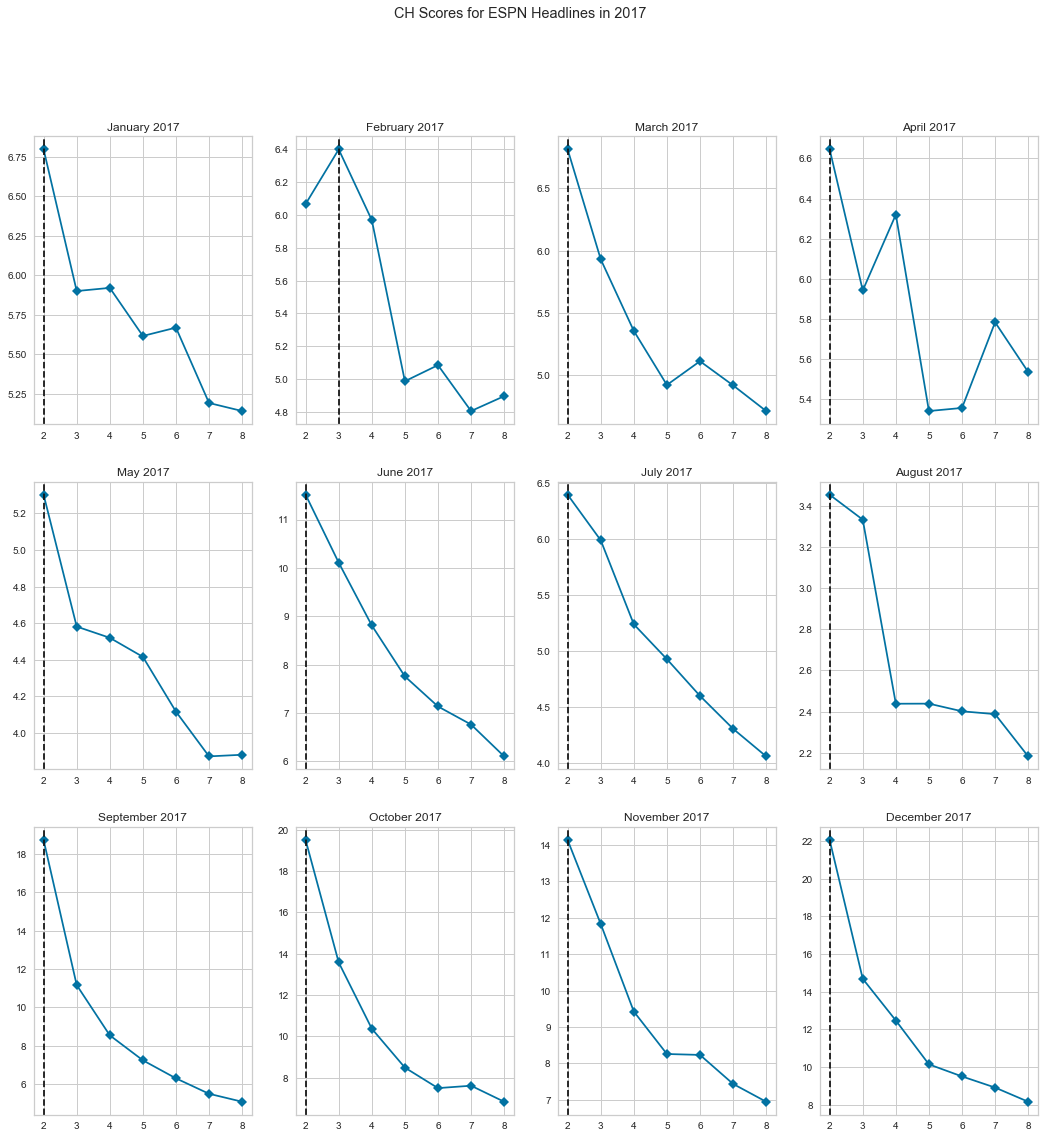

In [41]:
fig, axs = plt.subplots(3, 4, figsize=(18,18))
kmeans = KMeans()

jan_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,0])
jan_viz.fit(jan17_tfidf)
axs[0,0].set_title('January 2017')

feb_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,1])
feb_viz.fit(feb17_tfidf)
axs[0,1].set_title('February 2017')

mar_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,2])
mar_viz.fit(mar17_tfidf)
axs[0,2].set_title('March 2017')

apr_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,3])
apr_viz.fit(apr17_tfidf)
axs[0,3].set_title('April 2017')

may_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,0])
may_viz.fit(may17_tfidf)
axs[1,0].set_title('May 2017')

jun_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,1])
jun_viz.fit(jun17_tfidf)
axs[1,1].set_title('June 2017')

jul_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,2])
jul_viz.fit(jul17_tfidf)
axs[1,2].set_title('July 2017')

aug_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,3])
aug_viz.fit(aug17_tfidf)
axs[1,3].set_title('August 2017')

sept_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,0])
sept_viz.fit(sept17_tfidf)
axs[2,0].set_title('September 2017')

oct_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,1])
oct_viz.fit(oct17_tfidf)
axs[2,1].set_title('October 2017')

nov_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,2])
nov_viz.fit(nov17_tfidf)
axs[2,2].set_title('November 2017')

dec_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,3])
dec_viz.fit(dec17_tfidf)
axs[2,3].set_title('December 2017')

plt.suptitle('CH Scores for ESPN Headlines in 2017')
plt.savefig('espn_ch_scores_2017.png')

In [42]:
jan18_tfidf = tfidf_vectorizer(jan2018)
feb18_tfidf = tfidf_vectorizer(feb2018)
mar18_tfidf = tfidf_vectorizer(mar2018)
apr18_tfidf = tfidf_vectorizer(apr2018)

may18_tfidf = tfidf_vectorizer(may2018)
jun18_tfidf = tfidf_vectorizer(jun2018)
jul18_tfidf = tfidf_vectorizer(jul2018)
aug18_tfidf = tfidf_vectorizer(aug2018)

sept18_tfidf = tfidf_vectorizer(sept2018)
oct18_tfidf = tfidf_vectorizer(oct2018)
nov18_tfidf = tfidf_vectorizer(nov2018)
dec18_tfidf = tfidf_vectorizer(dec2018)

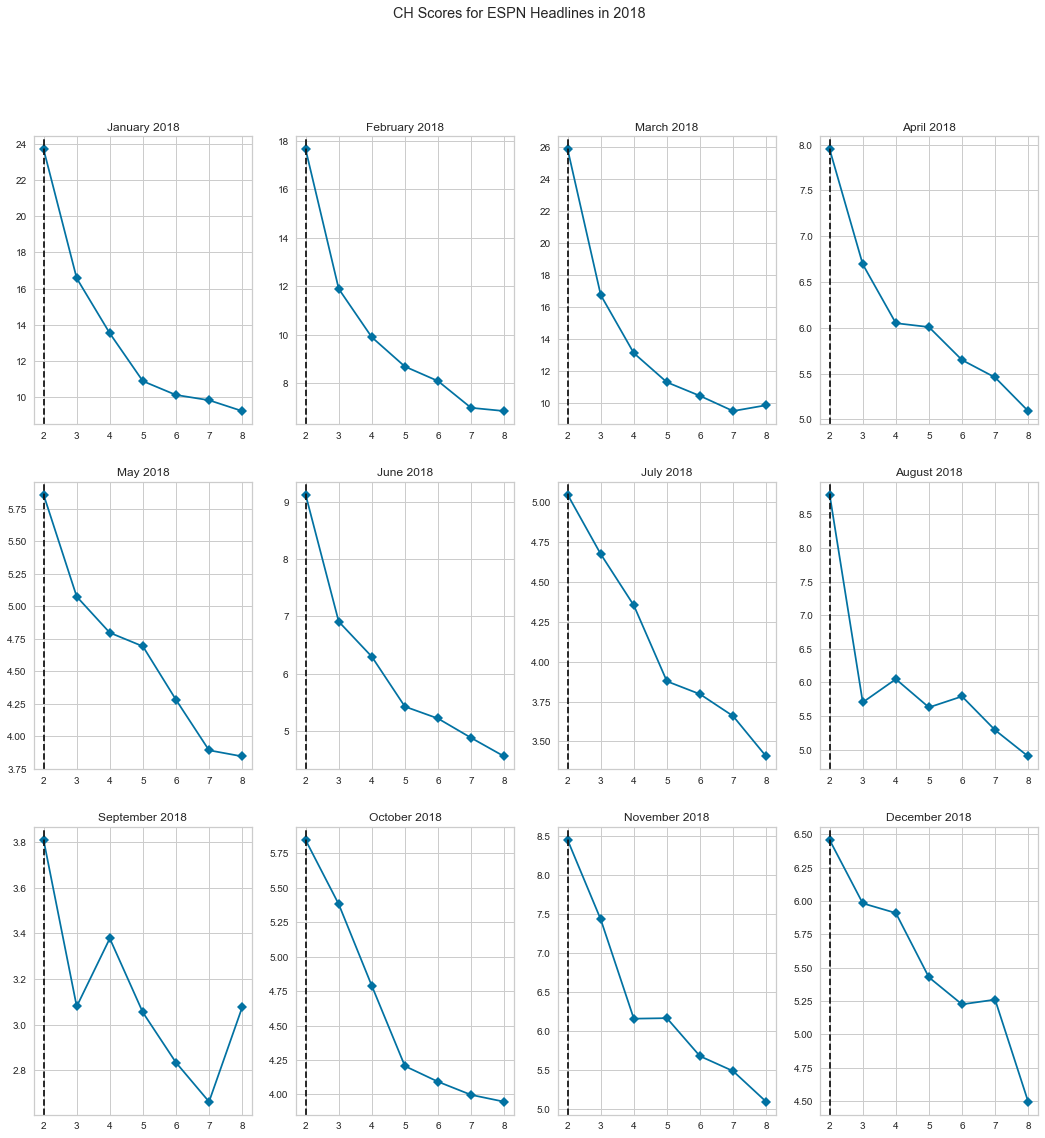

In [43]:
fig, axs = plt.subplots(3, 4, figsize=(18,18))
kmeans = KMeans()

jan_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,0])
jan_viz.fit(jan18_tfidf)
axs[0,0].set_title('January 2018')

feb_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,1])
feb_viz.fit(feb18_tfidf)
axs[0,1].set_title('February 2018')

mar_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,2])
mar_viz.fit(mar18_tfidf)
axs[0,2].set_title('March 2018')

apr_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,3])
apr_viz.fit(apr18_tfidf)
axs[0,3].set_title('April 2018')

may_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,0])
may_viz.fit(may18_tfidf)
axs[1,0].set_title('May 2018')

jun_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,1])
jun_viz.fit(jun18_tfidf)
axs[1,1].set_title('June 2018')

jul_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,2])
jul_viz.fit(jul18_tfidf)
axs[1,2].set_title('July 2018')

aug_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,3])
aug_viz.fit(aug18_tfidf)
axs[1,3].set_title('August 2018')

sept_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,0])
sept_viz.fit(sept18_tfidf)
axs[2,0].set_title('September 2018')

oct_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,1])
oct_viz.fit(oct18_tfidf)
axs[2,1].set_title('October 2018')

nov_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,2])
nov_viz.fit(nov18_tfidf)
axs[2,2].set_title('November 2018')

dec_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,3])
dec_viz.fit(dec18_tfidf)
axs[2,3].set_title('December 2018')

plt.suptitle('CH Scores for ESPN Headlines in 2018')
plt.savefig('espn_ch_scores_2018.png')


In [44]:
jan19_tfidf = tfidf_vectorizer(jan2019)
feb19_tfidf = tfidf_vectorizer(feb2019)
mar19_tfidf = tfidf_vectorizer(mar2019)
apr19_tfidf = tfidf_vectorizer(apr2019)

may19_tfidf = tfidf_vectorizer(may2019)
jun19_tfidf = tfidf_vectorizer(jun2019)
jul19_tfidf = tfidf_vectorizer(jul2019)
aug19_tfidf = tfidf_vectorizer(aug2019)

sept19_tfidf = tfidf_vectorizer(sept2019)
oct19_tfidf = tfidf_vectorizer(oct2019)
nov19_tfidf = tfidf_vectorizer(nov2019)
dec19_tfidf = tfidf_vectorizer(dec2019)

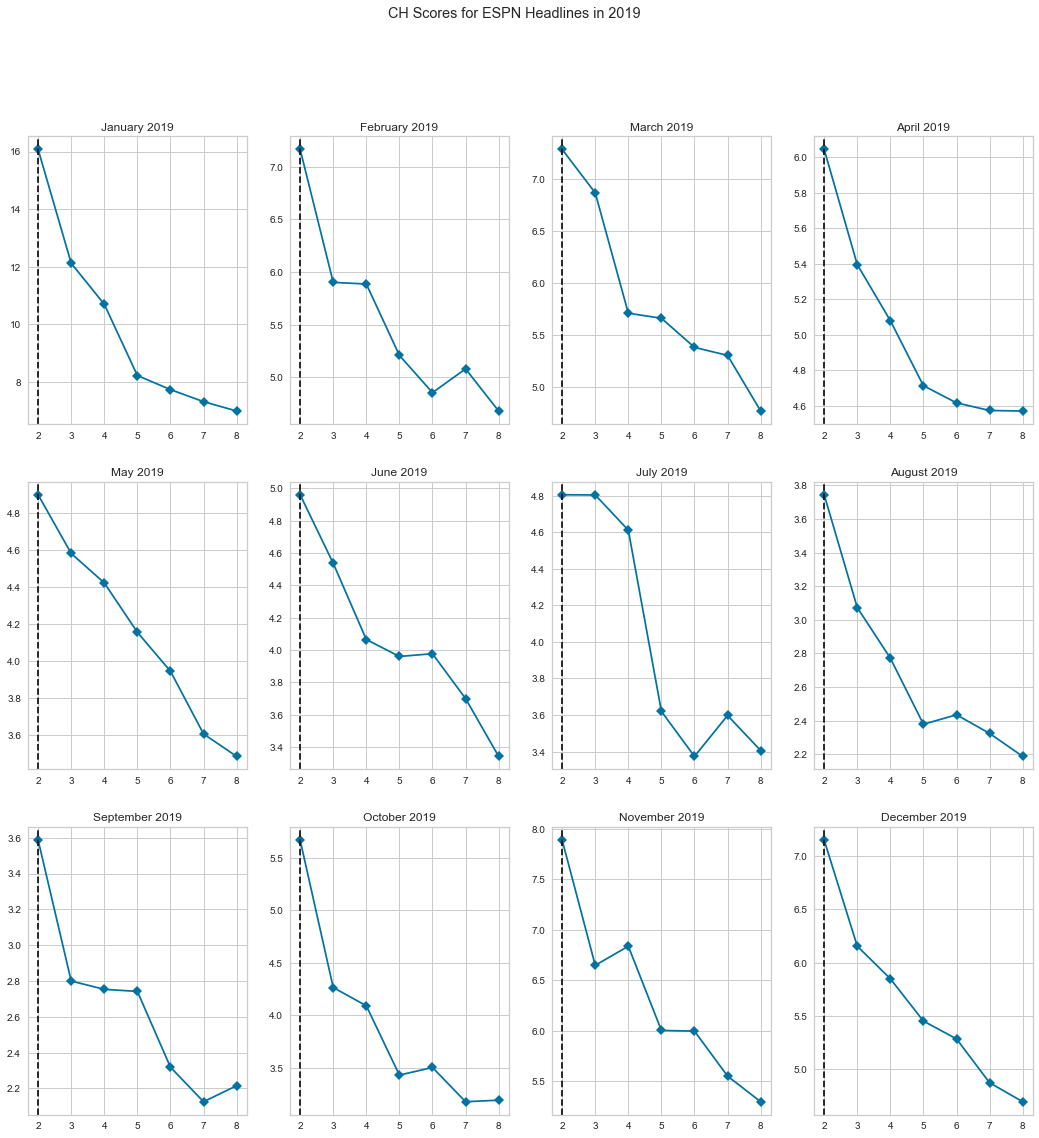

In [45]:
fig, axs = plt.subplots(3, 4, figsize=(18,18))
kmeans = KMeans()

jan_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,0])
jan_viz.fit(jan19_tfidf)
axs[0,0].set_title('January 2019')

feb_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,1])
feb_viz.fit(feb19_tfidf)
axs[0,1].set_title('February 2019')

mar_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,2])
mar_viz.fit(mar19_tfidf)
axs[0,2].set_title('March 2019')

apr_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,3])
apr_viz.fit(apr19_tfidf)
axs[0,3].set_title('April 2019')

may_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,0])
may_viz.fit(may19_tfidf)
axs[1,0].set_title('May 2019')

jun_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,1])
jun_viz.fit(jun19_tfidf)
axs[1,1].set_title('June 2019')

jul_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,2])
jul_viz.fit(jul19_tfidf)
axs[1,2].set_title('July 2019')

aug_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,3])
aug_viz.fit(aug19_tfidf)
axs[1,3].set_title('August 2019')

sept_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,0])
sept_viz.fit(sept19_tfidf)
axs[2,0].set_title('September 2019')

oct_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,1])
oct_viz.fit(oct19_tfidf)
axs[2,1].set_title('October 2019')

nov_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,2])
nov_viz.fit(nov19_tfidf)
axs[2,2].set_title('November 2019')

dec_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,3])
dec_viz.fit(dec19_tfidf)
axs[2,3].set_title('December 2019')

plt.suptitle('CH Scores for ESPN Headlines in 2019')
plt.savefig('espn_ch_scores_2019.png')


In [46]:
jan20_tfidf = tfidf_vectorizer(jan2020)
feb20_tfidf = tfidf_vectorizer(feb2020)
mar20_tfidf = tfidf_vectorizer(mar2020)
apr20_tfidf = tfidf_vectorizer(apr2020)

may20_tfidf = tfidf_vectorizer(may2020)
jun20_tfidf = tfidf_vectorizer(jun2020)
jul20_tfidf = tfidf_vectorizer(jul2020)
aug20_tfidf = tfidf_vectorizer(aug2020)

sept20_tfidf = tfidf_vectorizer(sept2020)
oct20_tfidf = tfidf_vectorizer(oct2020)
nov20_tfidf = tfidf_vectorizer(nov2020)
dec20_tfidf = tfidf_vectorizer(dec2020)

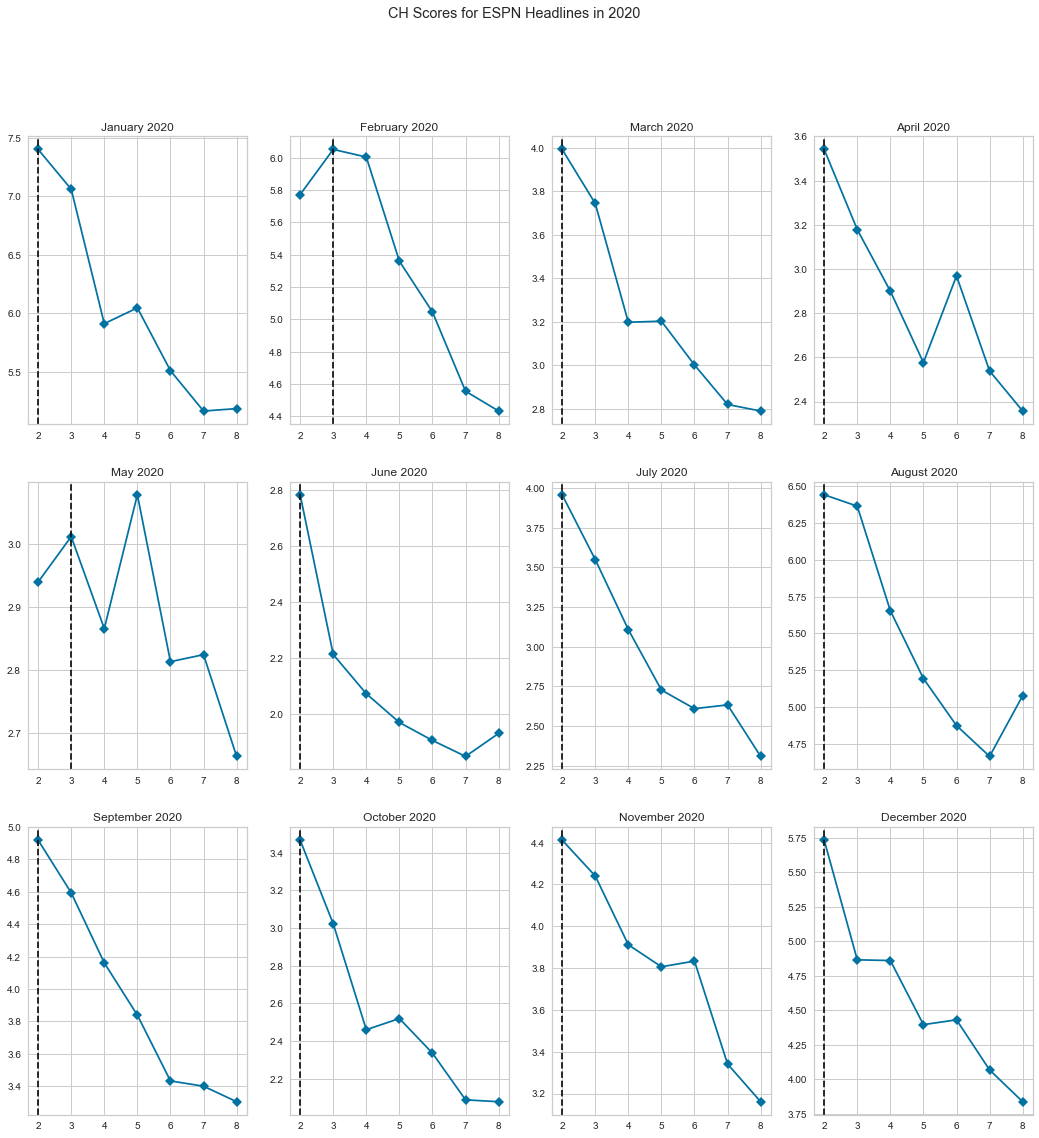

In [47]:
fig, axs = plt.subplots(3, 4, figsize=(18,18))
kmeans = KMeans()

jan_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,0])
jan_viz.fit(jan20_tfidf)
axs[0,0].set_title('January 2020')

feb_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,1])
feb_viz.fit(feb20_tfidf)
axs[0,1].set_title('February 2020')

mar_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,2])
mar_viz.fit(mar20_tfidf)
axs[0,2].set_title('March 2020')

apr_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0,3])
apr_viz.fit(apr20_tfidf)
axs[0,3].set_title('April 2020')

may_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,0])
may_viz.fit(may20_tfidf)
axs[1,0].set_title('May 2020')

jun_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,1])
jun_viz.fit(jun20_tfidf)
axs[1,1].set_title('June 2020')

jul_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,2])
jul_viz.fit(jul20_tfidf)
axs[1,2].set_title('July 2020')

aug_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1,3])
aug_viz.fit(aug20_tfidf)
axs[1,3].set_title('August 2020')

sept_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,0])
sept_viz.fit(sept20_tfidf)
axs[2,0].set_title('September 2020')

oct_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,1])
oct_viz.fit(oct20_tfidf)
axs[2,1].set_title('October 2020')

nov_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,2])
nov_viz.fit(nov20_tfidf)
axs[2,2].set_title('November 2020')

dec_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[2,3])
dec_viz.fit(dec20_tfidf)
axs[2,3].set_title('December 2020')

plt.suptitle('CH Scores for ESPN Headlines in 2020')
plt.savefig('espn_ch_scores_2020.png')


In [48]:
jan21_tfidf = tfidf_vectorizer(jan2021)
feb21_tfidf = tfidf_vectorizer(feb2021)

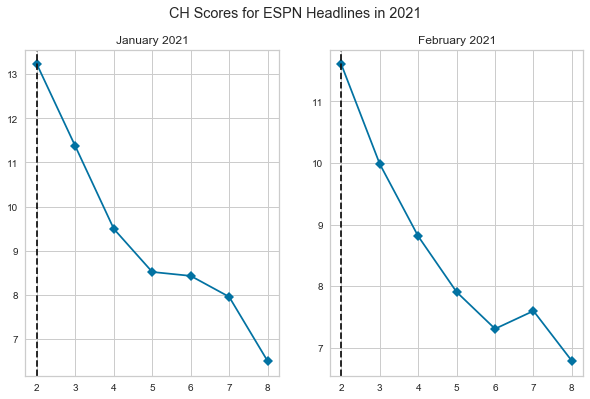

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))
kmeans = KMeans()

jan_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[0])
jan_viz.fit(jan21_tfidf)
axs[0].set_title('January 2021')

feb_viz = KElbowVisualizer(kmeans, k=(2,9), metric = 'calinski_harabasz', timings=False, ax=axs[1])
feb_viz.fit(feb21_tfidf)
axs[1].set_title('February 2021')

plt.suptitle('CH Scores for ESPN Headlines in 2021')
plt.savefig('espn_ch_scores_2021.png')

In [50]:
espn16 = [len(jan2016), len(feb2016), len(mar2016), len(apr2016), len(may2016), len(jun2016), len(jul2016),
 len(aug2016), len(sept2016), len(oct2016), len(nov2016), len(dec2016)]

espn17 = [len(jan2017), len(feb2017), len(mar2017), len(apr2017), len(may2017), len(jun2017), len(jul2017),
 len(aug2017), len(sept2017), len(oct2017), len(nov2017), len(dec2017)]

espn18 = [len(jan2018), len(feb2018), len(mar2018), len(apr2018), len(may2018), len(jun2018), len(jul2018),
 len(aug2018), len(sept2018), len(oct2018), len(nov2018), len(dec2018)]

espn19 = [len(jan2019), len(feb2019), len(mar2019), len(apr2019), len(may2019), len(jun2019), len(jul2019),
 len(aug2019), len(sept2019), len(oct2019), len(nov2019), len(dec2019)]

espn20 = [len(jan2020), len(feb2020), len(mar2020), len(apr2020), len(may2020), len(jun2020), len(jul2020),
 len(aug2020), len(sept2020), len(oct2020), len(nov2020), len(dec2020)]

espn21 = [len(jan2021), len(feb2021)]

In [51]:
print(f"Number of ESPN NBA Headlines in 2016: {sum(espn16)}")
print(f"Number of ESPN NBA Headlines in 2017: {sum(espn17)}")
print(f"Number of ESPN NBA Headlines in 2018: {sum(espn18)}")
print(f"Number of ESPN NBA Headlines in 2019: {sum(espn19)}")
print(f"Number of ESPN NBA Headlines in 2020: {sum(espn20)}")
print(f"Number of ESPN NBA Headlines in 2021: {sum(espn21)}")

Number of ESPN NBA Headlines in 2016: 7156
Number of ESPN NBA Headlines in 2017: 8306
Number of ESPN NBA Headlines in 2018: 7690
Number of ESPN NBA Headlines in 2019: 6675
Number of ESPN NBA Headlines in 2020: 5259
Number of ESPN NBA Headlines in 2021: 1555


In [52]:
espn_df = pd.concat([jan2016, feb2016, mar2016, apr2016, may2016, jun2016,
                      jul2016, aug2016, sept2016, oct2016, nov2016, dec2016,
                      jan2017, feb2017, mar2017, apr2017, may2017, jun2017,
                      jul2017, aug2017, sept2017, oct2017, nov2017, dec2017,
                      jan2018, feb2018, mar2018, apr2018, may2018, jun2018,
                      jul2018, aug2018, sept2018, oct2018, nov2018, dec2018,
                      jan2019, feb2019, mar2019, apr2019, may2019, jun2019,
                      jul2019, aug2019, sept2019, oct2019, nov2019, dec2019,
                      jan2020, feb2020, mar2020, apr2020, may2020, jun2020,
                      jul2020, aug2020, sept2020, oct2020, nov2020, dec2020,
                      jan2021, feb2021], ignore_index=True)

In [53]:
tfidf_vec = TfidfVectorizer(stop_words=stopwords)
espn_tfidf = tfidf_vec.fit_transform(espn_df['headlines'])
espn_df_tfidf = pd.DataFrame(espn_tfidf.toarray())
espn_df_tfidf.columns = tfidf_vec.get_feature_names()

In [54]:
print(espn_df_tfidf.shape)

(36641, 12385)


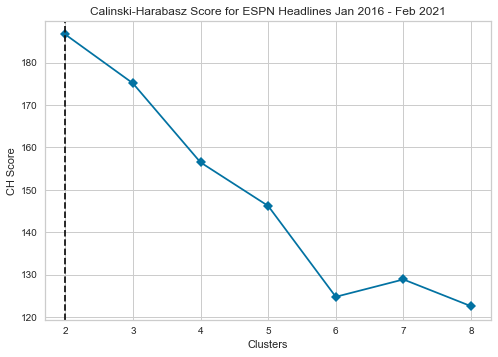

In [55]:
model = KMeans()
espn_viz = KElbowVisualizer(model, k=(2,9), metric = 'calinski_harabasz', timings=False)
espn_viz.fit(espn_df_tfidf)
plt.title('Calinski-Harabasz Score for ESPN Headlines Jan 2016 - Feb 2021')
plt.xlabel('Clusters')
plt.ylabel('CH Score')
plt.savefig('espn_total_ch_plot.png')

In [56]:
from collections import Counter

In [57]:
kmeans_two = KMeans(n_clusters=2, random_state=123)
kmeans_two.fit(espn_df_tfidf)
binary_classes = kmeans_two.predict(espn_df_tfidf)

In [58]:
espn_bin = espn_df
espn_bin['labels'] = binary_classes

In [59]:
espn_bin.labels.value_counts()

0    31232
1     5409
Name: labels, dtype: int64

In [61]:
pd.set_option('display.max_rows', None)
espn_bin.loc[espn_bin['labels'] == 0].sample(n=100, random_state=42)

,headlines,posted_time,tokens,labels
15065,Philadelphia All Access on ESPN,2017-12-13,"[philadelphia, access, espn]",0
8916,Spurs' Popovich on the verge of historic miles...,2017-02-04,"[spur, popovich, verge, historic, milestone]",0
33606,Pelicans can't afford loss to woeful Wizards,2020-08-07,"[pelican, cant, afford, loss, woeful, wizard]",0
27493,Sources: Lakers' Cousins has serious knee injury,2019-08-15,"[source, lakers, cousin, serious, knee, injury]",0
22824,Sources: Dirk's season debut set for Thursday,2018-12-13,"[source, dirk, season, debut, set, thursday]",0
20548,Summer Forecast: Most likely first-time All-St...,2018-08-08,"[summer, forecast, likely, firsttime, allstars...",0
14824,"Bryant: Despite recent successes, everyone los...",2017-12-21,"[bryant, despite, recent, success, everyone, l...",0
6166,Magic rally from 18 down to top winless 76ers ...,2016-11-01,"[magic, rally, 18, top, winless, 76ers, 103101]",0
30612,LeVert's return from thumb injury can't spark ...,2020-01-04,"[leverts, return, thumb, injury, cant, spark, ...",0
18975,Playoff-eliminated Pistons look for motivation...,2018-04-05,"[playoffeliminated, piston, look, motivation, ...",0


In [62]:
espn_bin.loc[espn_bin['labels'] == 1].sample(n=100, random_state=42)

,headlines,posted_time,tokens,labels
34486,New NBA calendar: Key dates for free agency an...,2020-11-19,"[new, nba, calendar, key, date, free, agency, ...",1
17925,Fantasy NBA Daily Notes: Scouring the league f...,2018-03-14,"[fantasy, nba, daily, note, scouring, league, ...",1
26305,"2020 NBA mock draft: New top three prospects, ...",2019-05-28,"[2020, nba, mock, draft, new, top, three, pros...",1
2885,NBA hub in Rio on tap for ticketless Olympic fans,2016-05-17,"[nba, hub, rio, tap, ticketless, olympic, fan]",1
22305,Grading the NBA's City uniforms,2018-11-01,"[grading, nbas, city, uniform]",1
13500,Aussie Bolden building NBA dream in Israel,2017-10-05,"[aussie, bolden, building, nba, dream, israel]",1
17984,Top building blocks and fades for Monday's NBA...,2018-03-12,"[top, building, block, fade, monday, nba, dfs,...",1
2515,Why the NBA slapped the wrist of Matthew Della...,2016-04-06,"[nba, slapped, wrist, matthew, dellavedova]",1
7021,"By tweaking NBA calendar, league continues the...",2016-12-05,"[tweaking, nba, calendar, league, continues, f...",1
15229,"Fantasy NBA Daily Notes: Hot Suns Thursday, Fr...",2017-12-08,"[fantasy, nba, daily, note, hot, sun, thursday...",1


In [63]:
espn_bin_0 = espn_bin.loc[espn_bin['labels'] == 0]
espn_bin_1 = espn_bin.loc[espn_bin['labels'] == 1]

zero_class_text = []
for element in espn_bin_0['tokens']:
    for word in element:
        zero_class_text.append(word)
        
zero_class_str = ' '.join(zero_class_text)
zero_dict = Counter(zero_class_text)

one_class_text = []
for element in espn_bin_1['tokens']:
    for word in element:
        one_class_text.append(word)
        
one_class_str = ' '.join(one_class_text)
one_class_dict = Counter(one_class_text)
         


In [64]:
zero_class_sorted = dict(sorted(zero_dict.items(), key= lambda item: item[1], reverse=True)) 
one_class_sorted = dict(sorted(one_class_dict.items(), key=lambda item: item[1], reverse=True))

espn_bin_zero_count_df = pd.DataFrame.from_dict(zero_class_sorted, orient='index', columns=['Count'])
espn_bin_zero_count_df.reset_index(inplace=True)
espn_bin_zero_count_df.rename(columns={'index':'Word'}, inplace=True)

espn_bin_one_count_df = pd.DataFrame.from_dict(one_class_sorted, orient='index', columns=['Count'])
espn_bin_one_count_df.reset_index(inplace=True)
espn_bin_one_count_df.rename(columns={'index':'Word'}, inplace=True)


Text(0.5, 1.0, "'1' Class")

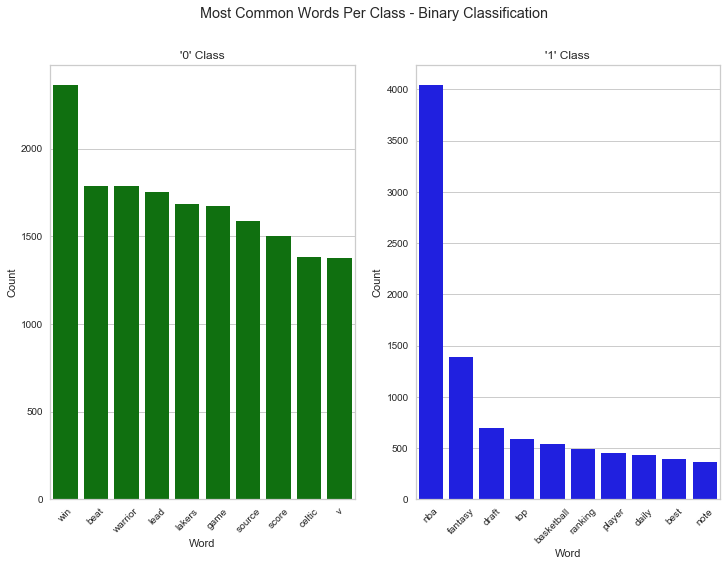

In [66]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(x=espn_bin_zero_count_df['Word'][:10], y=espn_bin_zero_count_df['Count'][:10], 
            data=espn_bin_zero_count_df[:10], ax=axs[0], color='green')
axs[0].tick_params(axis='x', labelrotation=45)
sns.barplot(x=espn_bin_one_count_df['Word'][:10], y=espn_bin_one_count_df['Count'][:10], 
            data=espn_bin_one_count_df[:10], ax=axs[1], color='blue')
axs[1].tick_params(axis='x', labelrotation=45)
plt.suptitle('Most Common Words Per Class - Binary Classification')
axs[0].set_title("'0' Class")
axs[1].set_title("'1' Class")

In [67]:
kmeans_three = KMeans(n_clusters=3, random_state=123)
kmeans_three.fit(espn_df_tfidf)
three_classes = kmeans_three.predict(espn_df_tfidf)

In [68]:
espn_three_df = espn_df
espn_three_df['labels'] = three_classes

In [69]:
espn_three_df['labels'].value_counts()

0    25221
1     6113
2     5307
Name: labels, dtype: int64

In [70]:
espn_three_df.loc[espn_three_df['labels'] == 0].sample(n=100, random_state=42)

,headlines,posted_time,tokens,labels
9200,Pacers hope to get it right versus 76ers,2017-03-26,"[pacer, hope, get, right, versus, 76ers]",0
1580,"Hornets top Heat 109-106, rallying from 15-poi...",2016-03-18,"[hornet, top, heat, 109106, rallying, 15point,...",0
36363,"AD practices, says he's being careful with Ach...",2021-02-11,"[ad, practice, say, he, careful, achilles]",0
28146,Zion 'a force' in Pelicans' preseason home opener,2019-10-12,"[zion, force, pelican, preseason, home, opener]",0
1569,"Lowry, Raptors send Celtics to fourth straight...",2016-03-19,"[lowry, raptor, send, celtic, fourth, straight...",0
32747,Thunder's Noel sits scrimmage after missing test,2020-07-28,"[thunder, noel, sits, scrimmage, missing, test]",0
34484,Inside the LaMelo Ball Draft Night Extravaganza,2020-11-19,"[inside, lamelo, ball, draft, night, extravaga...",0
14335,"Spurs' White fractures wrist, out indefinitely",2017-11-06,"[spur, white, fracture, wrist, indefinitely]",0
9703,Buss sibling: Brothers trying to bust family t...,2017-03-08,"[bus, sibling, brother, trying, bust, family, ...",0
1028,Hornets' Kidd-Gilchrist again has torn labrum,2016-02-11,"[hornet, kiddgilchrist, torn, labrum]",0


In [71]:
espn_three_df.loc[espn_three_df['labels'] == 1].sample(n=100, random_state=42)

,headlines,posted_time,tokens,labels
24486,Bogdanovic leads Pacers past Cavaliers for 5th...,2019-02-09,"[bogdanovic, lead, pacer, past, cavalier, 5th,...",1
1236,"Kobe scores 38, Lakers beat Wolves 119-115 to ...",2016-02-03,"[kobe, score, 38, lakers, beat, wolf, 119115, ...",1
17675,"LeBron scores 35, carries Cavaliers past Rapto...",2018-03-21,"[lebron, score, 35, carry, cavalier, past, rap...",1
35812,"Gordon helps Magic beat Cavaliers 103-83, snap...",2021-01-04,"[gordon, help, magic, beat, cavalier, 10383, s...",1
26237,Horford logs first triple-double as a Celtic i...,2019-04-02,"[horford, log, first, tripledouble, celtic, win]",1
2097,Hornets drop Heat for 1st playoff win in 14 years,2016-04-23,"[hornet, drop, heat, 1st, playoff, win, 14, year]",1
22698,"George, Westbrook lead Thunder past Bulls 121-96",2018-12-18,"[george, westbrook, lead, thunder, past, bull,...",1
23346,Westbrook's 15th triple-double leads Thunder p...,2019-01-25,"[westbrooks, 15th, tripledouble, lead, thunder...",1
22669,Lin's big 4th quarter leads Hawks past Wizards...,2018-12-18,"[lin, big, 4th, quarter, lead, hawk, past, wiz...",1
2161,"Clippers dominate 4th to beat Blazers 102-81, ...",2016-04-21,"[clipper, dominate, 4th, beat, blazer, 10281, ...",1


In [72]:
espn_three_df.loc[espn_three_df['labels'] == 2].sample(n=100, random_state=42)

,headlines,posted_time,tokens,labels
6312,Fantasy basketball Top 150: Zach LaVine soars ...,2016-12-27,"[fantasy, basketball, top, 150, zach, lavine, ...",2
35981,How will the NBA's compressed second-half sche...,2021-02-25,"[nbas, compressed, secondhalf, schedule, impac...",2
13911,Top stars and bargains for Sunday's NBA DFS slate,2017-11-19,"[top, star, bargain, sunday, nba, dfs, slate]",2
9244,FSU freshman Isaac declares for NBA draft,2017-03-24,"[fsu, freshman, isaac, declares, nba, draft]",2
21026,Fantasy NBA Daily Notes: Kawhi has returned to...,2018-10-25,"[fantasy, nba, daily, note, kawhi, returned, e...",2
11054,Lonzo Ball or Markelle Fultz: Who should be No...,2017-05-06,"[lonzo, ball, markelle, fultz, 1, 2017, nba, d...",2
34213,Are LeBron's four NBA titles better than Jorda...,2020-10-13,"[lebrons, four, nba, title, better, jordan, six]",2
19679,Why NBA teams can get good free agents at low ...,2018-06-29,"[nba, team, get, good, free, agent, low, price]",2
19361,FAQ: How will legal gambling change the NBA an...,2018-05-17,"[faq, legal, gambling, change, nba, way, watch]",2
14199,Top stars and bargains for Friday's NBA DFS slate,2017-11-10,"[top, star, bargain, friday, nba, dfs, slate]",2


In [ ]:
espn_tri_zero = espn_three_df.loc[espn_three_df['labels'] == 0]
espn_tri_one = espn_three_df.loc[espn_three_df['labels'] == 1]
espn_tri_two = espn_three_df.loc[espn_three_df['labels'] == 2]

tri_zero_class_text = []
for element in espn_three_df['tokens']:
    for word in element:
        zero_class_text.append(word)
        
tri_zero_class_str = ' '.join(tri_zero_class_text)
tri_zero_dict = Counter(tri_zero_class_text)

one_class_text = []
for element in espn_bin_1['tokens']:
    for word in element:
        one_class_text.append(word)
        
one_class_str = ' '.join(one_class_text)
one_class_dict = Counter(one_class_text)

In [84]:
def calculate_ch_score(dataframe, month, year):
    
    tfidf = TfidfVectorizer(stop_words=stopwords)
    month_tfidf = tfidf.fit_transform(dataframe['headlines'])
    
    month_df = pd.DataFrame(month_tfidf.toarray())
    month_df.columns = tfidf.get_feature_names()
    
    ch_scores_list = []
    
    for k in range(2,9):
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans.fit(month_df)
        cluster_assignments = kmeans.predict(month_df)
        ch_score = calinski_harabasz_score(month_df, cluster_assignments)
        ch_scores_list.append(ch_score)
        
    fig = plt.figure(figsize=(8,8))
    plt.plot(list(range(2,9)), ch_scores_list)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Calinski Harabasz Score')
    plt.title(f'ESPN Headlines- {month} {year}')
    
    #ax = fig.add_subplot(1, 1, 1)
    #ax.plot(list(range(2,9)), ch_scores_list)
    #ax.set_xlabel('Number of Clusters')
    #ax.set_ylabel(f'Calinski Harabasz Score')
    #ax.set_title(f'ESPN Headlines- {month} {year}')
    
    